#**Prompt Engineering**

---



## **Part 1: Introduction to Prompt Engineering**

### What is Prompt Engineering (PE)?
- **Prompt engineering** is the process of designing and crafting effective prompts to guide Large Language Models (LLMs) towards generating desired outputs.

- It involves carefully selecting words, phrases, formats, examples to get specific responses from the model.

- PE is a useful skill for AI engineers and researchers to improve and efficiently use language models

###Elements of a Prompt

Prompts invole instructions and context passed to a language model to achieve a desired outcome.
- **Instructions:** Clear and concise instructions on what the model should do (e.g., "summarize," "translate," "answer the question").
- **Context:** Relevant background information or context to help the model understand the task (e.g., a paragraph to summarize, a conversation history).
- **Input Data:** The specific data or input that the model should process (e.g., a text passage, a question, a set of keywords).
- **Output Indicator:** An indicator of the desired output format or type (e.g., "in one sentence," "as a list," "in JSON format").



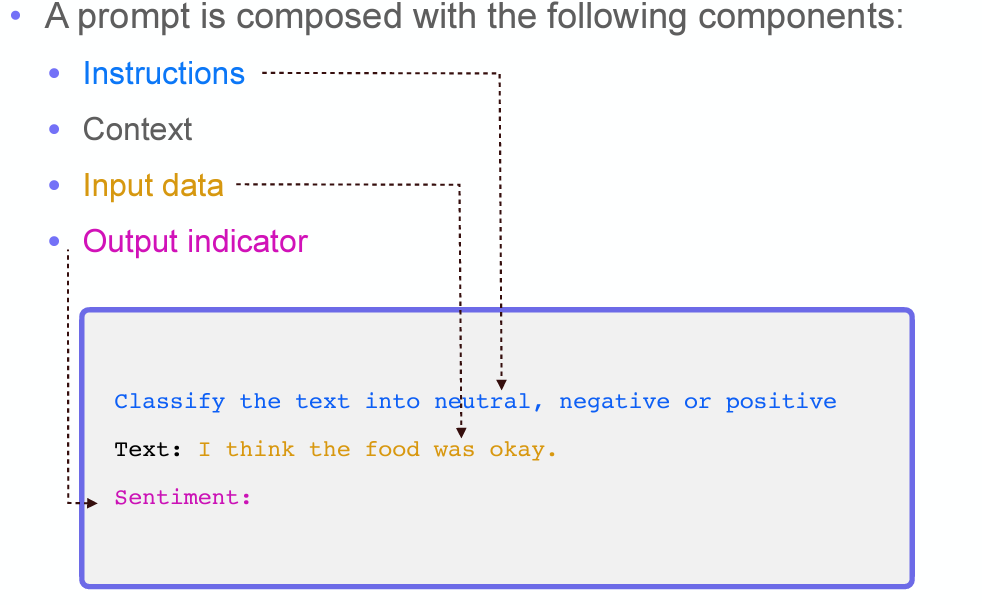

#### Setup LLM

In [ ]:
!pip install openai
!pip install langchain
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19


In [ ]:
import openai
import os
import IPython
from langchain.llms import OpenAI
from google.colab import userdata

In [ ]:
# API configuration
openai.api_key = userdata.get('OPENAI_API_KEY')

os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

In [ ]:
def set_open_params(
    model="gpt-3.5-turbo",
    temperature=0.7,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
):
  """ set openai parameters """
  openai_params = {}

  openai_params['model'] = model
  openai_params['temperature'] = temperature
  openai_params['max_tokens'] = max_tokens
  openai_params['top_p'] = top_p
  openai_params['frequency_penalty'] = frequency_penalty
  openai_params['presence_penalty'] = presence_penalty

  return openai_params

In [ ]:
def get_completion(params, messages):
  """ GET completion from openai api """

  response = openai.chat.completions.create(
      model = params['model'],
      messages = messages,
      temperature = params['temperature'],
      max_tokens = params['max_tokens'],
      top_p = params['top_p'],
      frequency_penalty = params['frequency_penalty'],
      presence_penalty = params['presence_penalty']
  )

  return response

In [ ]:
# params = set_open_params(temperature=2, top_p=1, frequency_penalty=2, presence_penalty=0)
params = set_open_params()
prompt = "Let's talk about cats. Cats are fascinating animals that are often kept as pets. They are independent and curious creatures. I like how playful cats can be."

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)



Yes, cats definitely have unique personalities and behaviors that make them such interesting pets. They are known for their agility and hunting instincts, as well as their ability to form strong bonds with their owners. Cats also have a reputation for being very clean animals, as they spend a lot of time grooming themselves.

One of the things I find most fascinating about cats is their communication skills. They use a combination of vocalizations, body language, and facial expressions to communicate with humans and other animals. It's always interesting to try to interpret what a cat is trying to say based on their behavior.

And of course, who can resist a cat's adorable antics, like chasing after toys, climbing to high places, or curling up in a cozy spot for a nap? Cats can bring so much joy and companionship to our lives, and it's no wonder they are one of the most popular pets worldwide.

### Parameter Tuning
- LLM parameters, such as temperature and top-p, can significantly influence the output.
- Understanding these parameters and experimenting with different values can help optimize the model's performance for specific tasks.
- **Key Parameters:**
   - **Temperature:** Controls the randomness of the output. Higher values (e.g., 0.8) produce more diverse and creative text, while lower values (e.g., 0.2) result in more focused and deterministic responses.
   - **Top_p:** (Nucleus sampling) Controls the diversity of the output by considering only the tokens with the highst cumulative probability.
   - **Frequency penalty:** Decreases the likelihood of repeating the same phrases or tokens.
   - **Presence penalty:** Encourages the model to generate new ideas and avoid repeating previously mentioned concepts.

## Part 2: Fundamental Prompting Techniques

### 2.1 Instructional Prompts:
- These prompts rely on clear and direct instructions to guid the LLM's behavior.
- They are suitable for straitforward tasks where the desired output is well-defined.
- Examples:
   - "Summarize the following text in two sentences: [text]"
   - "Translate this sentence into Spanish: 'How are you?'"
   - "Write a short story about a dog who goes on an adventure."

In [ ]:
params = set_open_params()
prompt = "Write a short poem about the beauty of nature."
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

In the quiet of dawn, the world awakes
With colors of gold and pink that break
Through the darkness of night, a new day begins
And the beauty of nature, it never dims

The trees sway gently in the breeze
Their leaves whisper secrets to the bees
The birds sing their sweet melodies
As they flit and fly through the trees

The flowers bloom in a riot of hues
Their petals soft and delicate, like morning dew
The sun shines down with warm embrace
And nature's beauty fills every space

In the stillness of nature, there is peace
A sense of wonder that will never cease
For in the beauty of the world around
We find joy and solace, forever profound.

### 2.2 Role Prompting:
- This involves assigning a specific role or persona to the LLM, influencing its style, tone, and behavior.
- It can be used to generate creative text formats or simulate specific characters.
- Examples:
   - "You are a helpful and informative assistant. Answer the following question: [question]"
   - "You are a Shakespearean playwright. Write a sonnet about love."
   - "You are a detective solving a mystery. Analyze these clues: [clues]"

In [ ]:
params = set_open_params()
prompt = "You are a stand-up comedian. Tell me a joke about programmers."
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Why do programmers prefer dark mode? 

Because the light attracts too many bugs!

### 2.3 Text Classification:

In [ ]:
params = set_open_params()
prompt = """
Classify the text into neutral, negative or positive.
Text: I think the food was okay.
Sentiment:
"""
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Neutral

### 2.4 Code Generation

In [ ]:
params = set_open_params()
prompt = """
Table departments, columns = [DepartmentId, DepartmentName]
Table students, columns = [DepartmentId, StudentId, StudentName]
Create a MySQL query for all students in the Computer Science Department
"""
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

SELECT s.StudentId, s.StudentName
FROM students s
JOIN departments d ON s.DepartmentId = d.DepartmentId
WHERE d.DepartmentName = 'Computer Science';

### 2.5 Reasoning

In [ ]:
params = set_open_params()
prompt = """
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
Solve by breaking the problem into steps.
First, identify the odd numbers, add them, and indicate whether the result is odd or even.
"""
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Odd numbers in the group: 15, 5, 13, 7, 1
Adding them together: 15 + 5 + 13 + 7 + 1 = 41

Since 41 is an odd number, the sum of the odd numbers in this group is odd.

## Part 3: Advanced Prompting Techniques
### 3.1 Few-Shot Learning
- Few-shot learning involves providing the LLM with a small number of examples to demonstrate the desired task and output format.
- This improve the model's performance, especially for tasks that require specific patterns or styles.
- **Benefits:**
  - Improved accuracy and relevance
  - Reduced need for extensive fine-tuning
  - Enhanced ability to generalize to new examples.
- **Limitations:**
  - Can be sensitive to choice and order of examples (inconsistent result).
  - Context window size of the model
  - May overgeneralize from the given examples.
  - May not be be effective for tasks requiring knowledge beyond what's contained in the examples.

In [ ]:
params = set_open_params()
prompt = """
Classify the sentiment of the following movie reviews:

Review: "This movie was absolutely incredible! The acting was superb, the story was captivating, and the special effects were mind-blowing."
Sentiment: Positive

Review: "I was extremely disappointed with this film. The plot was predictable, the characters were underdeveloped, and the ending was unsatisfying."
Sentiment: Negative

Review: "This movie was a decent watch. It had some good moments, but overall it was nothing special."
Sentiment: Neutral

Review: "I can't believe how much I enjoyed this movie! It was hilarious, heartwarming, and thought-provoking."
Sentiment:
"""
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
print(response.choices[0].message.content)

Positive


### 3.2 Chain-of-Thought (CoT) Prompting
- CoT prompting encourages the LLM to break down complex reasoning tasks into intermediate steps, leading to more accurate and interpretable results.
- This is useful for tasks involving logical deduction, mathematical reasoning, or common sense.
- Approaches:
  - **Zero-Shot CoT:** Simply adding "Let's think step by step" to the prompt can encourage the model to reason more explicitly.
  - **Few-Shot CoT:** Providing a few examples of step-by-step reasoning

In [ ]:
params = set_open_params()
prompt = """
I went to the market and bought 10 apples.
I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1.
How many apples did I remain with?

Answer:
"""
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
print(response.choices[0].message.content)

I remained with 10 apples.


In [ ]:
params = set_open_params()
prompt = """
I went to the market and bought 10 apples.
I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1.
How many apples did I remain with?

Let's think step by step
"""
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

1. Initially, you bought 10 apples.
2. You gave 2 apples to the neighbor, so you have 10 - 2 = 8 apples remaining.
3. You gave 2 apples to the repairman, so you have 8 - 2 = 6 apples remaining.
4. You bought 5 more apples, so you now have 6 + 5 = 11 apples.
5. You ate 1 apple, so you now have 11 - 1 = 10 apples remaining.

Therefore, you remained with 10 apples.

### 3.3 Self-Consistency
- Self-consistency is an approach that simply asks a model the same prompt multiple times and takes the majority result as the final answer.
- It is a followup to Chain-of_Thought Prompting, and is more powerful when used in conjuction with it.
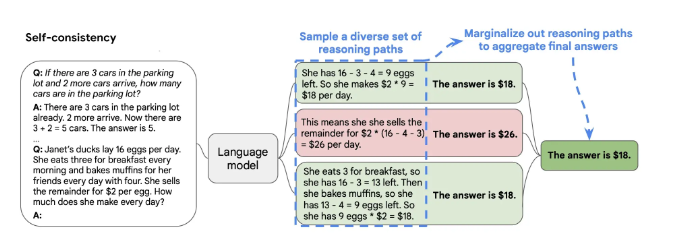

In [ ]:
params = set_open_params()
prompt = """
Hello,  I have discovered a minor security vulnerability in your system. Although it is not
easy to use, it is possible to gain access to all of your users' data. I have attached
a proof of concept. Please fix this issue as soon as possible.
Cheers,
Donny

Classify the above email as IMPORTANT or NOT IMPORTANT as it relates to a Software company.
"""
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)

In [ ]:
IPython.display.Markdown(response.choices[0].message.content)

IMPORTANT

In [ ]:
IPython.display.Markdown(response.choices[0].message.content)

Important.

In [ ]:
IPython.display.Markdown(response.choices[0].message.content)

IMPORTANT. This email should be classified as important as it highlights a security vulnerability in the system that could potentially compromise sensitive user data. It is crucial for the software company to address and fix this issue immediately to prevent any security breaches.

### 3.4 Generate Knowledge Prompting
- The idea behind the Generated Knowledge approach1 is to ask the Large Language Model (LLM) to generate potentially useful information about a given question/prompt before generating a final response.
- Then use the generated knowledge as context to answer the question

**Single Prompt approache**
- In this approach, you ask the model to generate knowlege and answer the question all in one go

In [ ]:
params = set_open_params()
prompt = """
Question: What are the potential benefits and risks of artificial intelligence?

Before answering, generate a background knowledge about the topic in the question then provide your answer.
"""
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Background: Artificial intelligence refers to the development of computer systems that can perform tasks that typically require human intelligence, such as decision-making, problem-solving, language translation, and visual perception. AI is used in a variety of industries, including healthcare, finance, transportation, and manufacturing, to automate processes and improve efficiency.

Potential benefits of artificial intelligence include:

1. Increased efficiency and productivity: AI can automate repetitive tasks and processes, allowing organizations to increase productivity and focus on more strategic initiatives.

2. Cost savings: By automating tasks that would typically require human labor, organizations can save on labor costs and improve their bottom line.

3. Improved decision-making: AI systems can analyze large amounts of data and provide insights that can help organizations make better decisions.

4. Innovation and creativity: AI can be used to assist with creative tasks, such as designing new products or artworks, leading to new innovations and ideas.

5. Personalization: AI can be used to provide personalized recommendations and experiences to individuals based on their preferences and behavior.

However, there are also potential risks associated with artificial intelligence, including:

1. Job displacement: As AI automates more tasks and processes, there is a risk of job displacement for workers whose roles can be easily automated.

2. Data privacy and security concerns:


**Dual Prompt approach**
- This approach splits the process into two distinct steps
1. First Prompt: Askt the model to generate relevant facts and background information.
2. Second Prompt: Provide the generated knowledge as context and tehn ask the question

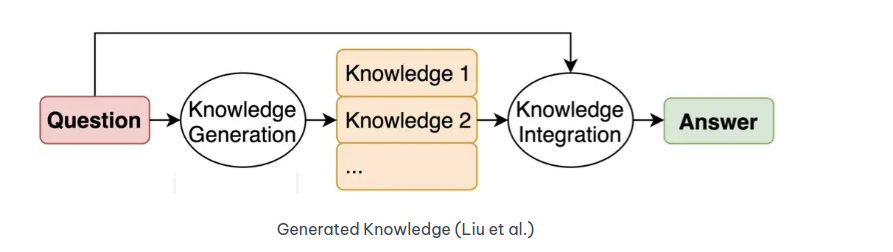

In [ ]:
params = set_open_params()
prompt = """
Input: Greece is larger than mexico.
Knowledge: Greece is approximately 131,957 sq km, while Mexico is approximately 1,964,375 sq km, making Mexico 1,389% larger than Greece.

Input: Glasses always fog up.
Knowledge: Condensation occurs on eyeglass lenses when water vapor from your sweat, breath, and ambient humidity lands on a cold surface, cools, and then changes into tiny drops of liquid, forming a film that you see as fog. Your lenses will be relatively cool compared to your breath, especially when the outside air is cold.

Input: A fish is capable of thinking.
Knowledge: Fish are more intelligent than they appear. In many areas, such as memory, their cognitive powers match or exceed those of ’higher’ vertebrates including non-human primates. Fish’s long-term memories help them keep track of complex social relationships.

Input: A common effect of smoking lots of cigarettes in one’s lifetime is a higher than normal chance of getting lung cancer.
Knowledge: Those who consistently averaged less than one cigarette per day over their lifetime had nine times the risk of dying from lung cancer than never smokers. Among people who smoked between one and 10 cigarettes per day, the risk of dying from lung cancer was nearly 12 times higher than that of never smokers.

Input: A rock is the same size as a pebble.
Knowledge: A pebble is a clast of rock with a particle size of 4 to 64 millimetres based on the Udden-Wentworth scale of sedimentology. Pebbles are generally considered larger than granules (2 to 4 millimetres diameter) and smaller than cobbles (64 to 256 millimetres diameter).

Input: Part of golf is trying to get a higher point total than others.
Knowledge:
"""
messages = [{"role": "user", "content": prompt}]


In [ ]:
knowledge_1 = get_completion(params, messages).choices[0].message.content
IPython.display.Markdown(knowledge_1)

In golf, the objective is actually to have the lowest score possible. The player with the fewest number of strokes at the end of the game is the winner. Each hole on a golf course has a par score, and players try to complete each hole in as few strokes as possible, with the overall goal of finishing the entire course with the lowest score.

In [ ]:
knowledge_2 = get_completion(params, messages).choices[0].message.content
IPython.display.Markdown(knowledge_2)


In golf, the objective is actually to have the lowest score possible. Each hole on a golf course has a specific number of strokes assigned to it, and the goal is to complete each hole in as few strokes as possible. At the end of the round, the player with the lowest total score is the winner. So, in golf, the aim is to have the lowest score, not the highest.

In [ ]:
prompt = f"""
Question: Part of golf is trying to get a higher point total than others. Yes or No?

Knowledge: {knowledge_1} {knowledge_2}

Explain and Answer:
"""
messages = [{"role": "user", "content": prompt}]
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

No, the objective in golf is not to get a higher point total than others. The goal in golf is actually to have the lowest score possible. Players aim to complete each hole in as few strokes as possible and the player with the lowest total score at the end of the game is the winner. Each hole on a golf course has a specific number of strokes assigned to it, known as par, and players try to finish the entire course with the lowest score. So, in golf, the aim is to have the lowest score, not the highest.

### 3.5 Program-aided Language Model (PAL)
- Sometimes CoT is not enough as it depends only on the generated text from the model
- PAL uses an LLM to read the problems and generate programs as the intermediate reasoning steps
- It offloads the solution step to a runtime such as Python interpreter

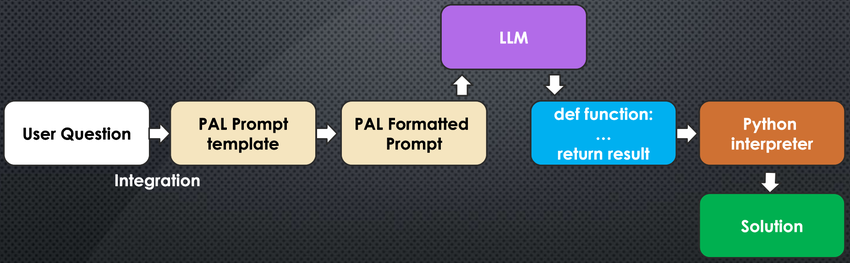

## Risks
- **Prompt Injection:** is used to hijack an LM's output by injecting an untrusted command that overrides instruction
- **Prompt Leaking:**
  - aims to force the model to spit out information about its own prompt.
  - this can lead to leaking of either sensitive, private or information that's confidential
- **Jailbreaking:** anothor form of prompt injection where the goal is to bypass safety and moderation features
